https://machinelearningmastery.com/neural-network-for-banknote-authentication/

In [7]:
from pandas import read_csv

# Load data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv'
df = read_csv(url)
# print data

print(df)

       3.6216    8.6661  -2.8073  -0.44699  0
0     4.54590   8.16740  -2.4586  -1.46210  0
1     3.86600  -2.63830   1.9242   0.10645  0
2     3.45660   9.52280  -4.0112  -3.59440  0
3     0.32924  -4.45520   4.5718  -0.98880  0
4     4.36840   9.67180  -3.9606  -3.16250  0
...       ...       ...      ...       ... ..
1366  0.40614   1.34920  -1.4501  -0.55949  1
1367 -1.38870  -4.87730   6.4774   0.34179  1
1368 -3.75030 -13.45860  17.5932  -2.77710  1
1369 -3.56370  -8.38270  12.3930  -1.28230  1
1370 -2.54190  -0.65804   2.6842   1.19520  1

[1371 rows x 5 columns]


            3.6216       8.6661      -2.8073     -0.44699            0
count  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000
mean      0.431410     1.917434     1.400694    -1.192200     0.444931
std       2.842494     5.868359     4.310105     2.101683     0.497139
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.774700    -1.711300    -1.553350    -2.417000     0.000000
50%       0.495710     2.313400     0.616630    -0.586650     0.000000
75%       2.814650     6.813100     3.181600     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


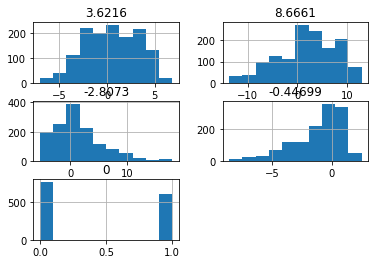

In [8]:
from pandas import read_csv
from matplotlib import pyplot
# Plot summarize statistics and plot dataset
print(df.describe())
# plot histogram
df.hist()
pyplot.show()

In [15]:
# process data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# split input and output columns
X,y = df.values[:,:-1],df.values[:,-1]

# ensures all data are floating point values
X = X.astype('float32');
# encode string into integer
y = LabelEncoder().fit_transform(y)

# split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

In [20]:
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot 

# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation ='relu', kernel_initializer = 'he_normal',input_shape = (n_features,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam',loss = 'binary_crossentropy')
# fit the model
history = model.fit(X_train,y_train, epochs =50, batch_size = 32, verbose =1,validation_data = (X_test, y_test))

Epoch 1/50
29/29 [==============================] - 0s 4ms/step - loss: 1.7998 - val_loss: 1.5058
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 1.3424 - val_loss: 1.0924
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 0.9479 - val_loss: 0.7430
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 0.6323 - val_loss: 0.4979
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4417 - val_loss: 0.3938
Epoch 6/50
29/29 [==============================] - 0s 2ms/step - loss: 0.3601 - val_loss: 0.3484
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 0.3186 - val_loss: 0.3156
Epoch 8/50
29/29 [==============================] - 0s 2ms/step - loss: 0.2874 - val_loss: 0.2876
Epoch 9/50
29/29 [==============================] - 0s 2ms/step - loss: 0.2608 - val_loss: 0.2621
Epoch 10/50
29/29 [==============================] - 0s 2ms/step - loss: 0.2373 - val_loss: 0.2377
Epoch 11/50
29/29 [

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 1.000


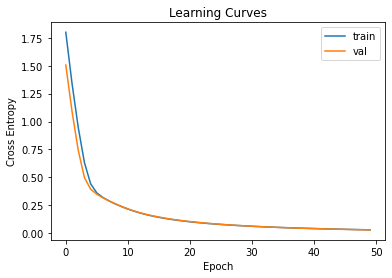

In [22]:
# predict test data
yhat = model.predict_classes(X_test)

# evaluate prediction
score = accuracy_score(y_test, yhat)
print('Accuracy : %0.3f' % score)

# plot learning curve
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [23]:
# k-fold cross-validation of base model for the banknote dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# prepare cross validation
kfold = StratifiedKFold(10)
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
	# split data
	X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
	# determine the number of input features
	n_features = X.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
	model.add(Dense(1, activation='sigmoid'))
	# compile the model
	model.compile(optimizer='adam', loss='binary_crossentropy')
	# fit the model
	model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
	# predict test set
	yhat = model.predict_classes(X_test)
	# evaluate predictions
	score = accuracy_score(y_test, yhat)
	print('>%.3f' % score)
	scores.append(score)
# summarize all scores
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>1.000


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>1.000


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>1.000


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>1.000


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>1.000


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>1.000


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>1.000


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>1.000


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>1.000
>0.993
Mean Accuracy: 0.999 (0.002)


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
